<a href="https://colab.research.google.com/github/manan-garg/EdTech_Learner_Clustering_Expert/blob/main/EdTech_Learner_Clustering_Expert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement:

Cluster learner profiles for similar characteristics based on job profile, company, and other features to understand groups of learners falling into similar category so that their upskilling capacity can be figured out.

In [ ]:
# Importing libraries -
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from pyclustertend import hopkins
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset -
df = pd.read_csv(r'scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
# Dropping unwanted column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


### Basic Metrics

In [ ]:
# Shape of the dataset -
df.shape

(205843, 6)

In [ ]:
# basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [ ]:
# Checking data types -
df.dtypes

company_hash         object
email_hash           object
orgyear             float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object

In [ ]:
#statistical summary
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


### Cleaning Data - Regex

In [ ]:
for i in ['company_hash','email_hash','job_position']:
    df[i] = df[i].str.lower()
    df[i] = df[i].replace('[^A-Za-z0-9 ]+', '',regex=True)

### Missing Values Treatment

In [ ]:
#Checking which columns have null values
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

#### Company_hash

In [ ]:
# Imputing with mode
df['company_hash'] = df['company_hash'].fillna(df['company_hash'].mode()[0])

In [ ]:
#Checking which columns have null values
df.isnull().sum()

company_hash            0
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

#### orgyear

In [ ]:
# creating a temporary dataframe and applying scaling for KNN Imputation
df_temp = df[['orgyear','ctc','ctc_updated_year']]
sc_x = StandardScaler()
df_temp = sc_x.fit_transform(df_temp)

In [ ]:
# KNN Imputation
df_temp = pd.DataFrame(df_temp,columns = ['orgyear','ctc','ctc_updated_year'])
imputer = KNNImputer(n_neighbors=5)
df_temp = pd.DataFrame(imputer.fit_transform(df_temp),columns = df_temp.columns)

In [ ]:
# inversing the scaling and getting original values to insert in original dataframe
df_temp = sc_x.inverse_transform(df_temp)
df_temp = pd.DataFrame(df_temp,columns = ['orgyear','ctc','ctc_updated_year'])
df['orgyear']=df_temp['orgyear']

In [ ]:
# Checking which columns have null values
df.isnull().sum()

company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [ ]:
# Removing rows where orgyear > current year
df = df[df['orgyear']<=date.today().year]

In [ ]:
# Removing rows where orgyear is not a valid entry
df = df[df['orgyear']>=1970]

#### job_position

In [ ]:
# Filling null values with 'other'
df['job_position'] = df['job_position'].fillna('other')

In [ ]:
# Checking which columns have null values
df.isnull().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

### Duplicate Rows Removal

In [ ]:
# Checking for duplicate rows
df.duplicated().sum()

4480

In [ ]:
# removing duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Checking for duplicate rows
df.duplicated().sum()

0

### Non-Graphical Analysis

In [ ]:
# Number of unique values in each column
df.nunique()

company_hash         37264
email_hash          153339
orgyear                 84
ctc                   3358
job_position           932
ctc_updated_year         7
dtype: int64

In [ ]:
# Checking value counts
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('\n')

company_hash
nvnv wgzohrnvzwj otqcxwto         7989
xzegojo                           5062
vbvkgz                            3392
zgn vuurxwvmrt vwwghzn            3245
wgszxkvzn                         3072
                                  ... 
qtcshqho                             1
xbo tzsxzttqxzs wgrrtst              1
nxrt                                 1
zgn jtn fgqpxzs onxrr onhajxzs       1
bvptbjnqxu td vbvkgz                 1
Name: company_hash, Length: 37264, dtype: int64


email_hash
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378    9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c    9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee    8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66    8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551    8
                                                                   ..
21a49c715040b70c7c15306ed2ae46e494eab204769bb183b4b194b5883acaf1    1
98cdca8

**Observations**

1) The company whose hash is 'nvnv wgzohrnvzwj otqcxwto' has the most number of profiles in the dataset.

2) The person with the email hash '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c' has the most number of entries in the dataset among other learners.

3) As per dataset most of the learners started their career in the year 2018. It means majority of Scaler learners have experience in the range of 4 to 5.

4) Most common ctc of scaler learners is 600000.

5) Job positions like 'backend engineer', 'fullstack engineer' and 'frontend engineer' constitute major chunk of scaler learner dataset.

6) Majority of the learners got their salary hike in the year 2019 followed by 2021 and 2020 respectively.

### Manual Clustering And Feature Engineering

In [ ]:
# Adding ‘Years of Experience’ column
df['years_of_Experience'] = date.today().year - df['orgyear']
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0


In [ ]:
# Adding ‘designation’ column for manual clustering
df_ctc = df.groupby(['company_hash','job_position','years_of_Experience']).ctc.describe()
df = pd.merge(df_ctc[['count','50%','75%']], df, left_index=True, right_on=['company_hash','job_position','years_of_Experience'])
df['designation'] = np.where(df['count']==1,1,0)
df['designation'] = np.where(df['ctc']<df['50%'], 3, df['designation'])
df['designation'] = np.where(df['ctc']>=df['75%'], 1, df['designation'])
df['designation'] = np.where(df['designation']==0, 2, df['designation'])
df.drop(['count','50%','75%'], axis=1,inplace=True)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience,designation
2940,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,other,2020.0,3.0,1
197540,0000,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,2017.0,300000,other,2020.0,6.0,1
74429,01 ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2016.0,270000,android engineer,2019.0,7.0,1
55241,01 ojztqsj,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,2011.0,830000,frontend engineer,2019.0,12.0,1
139865,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,backend engineer,2021.0,4.0,1


In [ ]:
# Adding ‘class’ column for manual clustering
df_ctc = df.groupby(['company_hash','job_position']).ctc.describe()
df = pd.merge(df_ctc[['count','50%','75%']], df, left_index=True, right_on=['company_hash','job_position'])
df['class'] = np.where(df['count']==1,1,0)
df['class'] = np.where(df['ctc']<df['50%'], 3, df['class'])
df['class'] = np.where(df['ctc']>=df['75%'], 1, df['class'])
df['class'] = np.where(df['class']==0, 2, df['class'])
df.drop(['count','50%','75%'], axis=1,inplace=True)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience,designation,class
2940,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,other,2020.0,3.0,1,1
197540,0000,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,2017.0,300000,other,2020.0,6.0,1,1
74429,01 ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2016.0,270000,android engineer,2019.0,7.0,1,1
55241,01 ojztqsj,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,2011.0,830000,frontend engineer,2019.0,12.0,1,1
139865,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,backend engineer,2021.0,4.0,1,1


In [ ]:
# Adding ‘tier’ column for manual clustering
df_ctc = df.groupby(['company_hash']).ctc.describe()
df = pd.merge(df_ctc[['count','50%','75%']], df, left_index=True, right_on=['company_hash'])
df['tier'] = np.where(df['count']==1,1,0)
df['tier'] = np.where(df['ctc']<df['50%'], 3, df['tier'])
df['tier'] = np.where(df['ctc']>=df['75%'], 1, df['tier'])
df['tier'] = np.where(df['tier']==0, 2, df['tier'])
df.drop(['count','50%','75%'], axis=1,inplace=True)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience,designation,class,tier
2940,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,other,2020.0,3.0,1,1,1
197540,0000,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,2017.0,300000,other,2020.0,6.0,1,1,1
74429,01 ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2016.0,270000,android engineer,2019.0,7.0,1,1,3
55241,01 ojztqsj,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,2011.0,830000,frontend engineer,2019.0,12.0,1,1,1
139865,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,backend engineer,2021.0,4.0,1,1,1


#### Questions and Answers

***1) Top 10 employees (earning more than most of the employees in the company) - Tier 1***

In [ ]:
df[df.tier == 1].sort_values('ctc',ascending=False).groupby('company_hash').head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience,designation,class,tier
72824,whmxw rgsxwo uqxcvnt rxbxnta,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,2015.0,1000150000,other,2020.0,8.0,1,1,1
117636,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018.0,255555555,other,2016.0,5.0,1,1,1
3301,aveegaxr xzntqzvnxgzvr hzxctqoxnj,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,2021.0,250000000,other,2020.0,2.0,1,1,1
11457,ntwy bvyxzaqv,16b1e23c22e9162f476ec3639ce875b0cc88678cc671e2...,2013.0,200000000,support engineer,2020.0,10.0,1,1,1
93816,vbvkgz wvzvav,005f352591238b78024ed320789c30e7815f0eea52ed98...,2020.0,200000000,other,2020.0,3.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
82028,uqgmrtb ogrcxzs,edcfb902656b736e1f35863298706d9d34ee795b7ed85a...,2018.0,500,cofounder,2019.0,5.0,1,1,1
166398,vcvzn sqghu,c411a6917058b50f44d7c62751be9b232155b23211de4c...,2013.0,300,database administrator,2019.0,10.0,1,1,1
91552,ftm ongqt,512f761579fb116e215cabc9821c7f81153f0763e16018...,2016.0,25,android engineer,2018.0,7.0,1,1,1
54820,uqvpqxnx voogwxvnto,8786759b95d673466e94f62f1b15e4f8c6bd7de6164074...,2020.0,24,other,2020.0,3.0,1,1,1


***2) Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1***

In [ ]:
df[(df['class'] == 1) & (df.job_position=='data scientist')].sort_values('ctc',ascending=False).groupby('company_hash').head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience,designation,class,tier
31297,ihvaqvnxw xzoxsyno ucn rna,bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...,2015.0,200000000,data scientist,2019.0,8.0,1,1,1
52818,zgzt,268a5aa92f0b6d0c675fc9cc1e300eb0c5930a3a139a23...,2022.0,200000000,data scientist,2020.0,1.0,1,1,1
836,mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj,cda8d723438e81185d2ee8c348870a4612eea974cdb2db...,2017.0,200000000,data scientist,2020.0,6.0,1,1,1
2688,ptnovvr qtnvxr rru,72ed7ced98573f71c8f95bc8b75aac4f0677e8872c6bec...,2019.0,199800000,data scientist,2020.0,4.0,1,1,1
45211,pgnvp,ace1152ca60b6f2c62bb7c4a00bca0afd5a9bb2c297267...,1992.0,150000000,data scientist,2020.0,31.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
200381,nyt mgongz wgzohrnxzs sqghu mws,cf663c71fc96db1ea5658342e2d73050b40ca479d324de...,2016.0,8000,data scientist,2021.0,7.0,1,1,3
92656,wtxuvr wgqu,0dcbef1fe34438edbb39b52451378ea61ac2b84a56d919...,2017.0,7500,data scientist,2019.0,6.0,1,1,1
183233,dvcgq,287dd26e9357888e0ba2c7482764131f7bbcb1748a4f56...,2019.0,7250,data scientist,2020.0,4.0,1,1,1
194182,otjch xzw,585f7e9865dcdcaad7edf10909d796ba2c5210cde3530b...,2017.0,4000,data scientist,2018.0,6.0,1,1,1


***3) Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3***

In [ ]:
df[(df['class'] == 3) & (df.job_position=='data scientist')].sort_values('ctc').groupby('company_hash').head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience,designation,class,tier
8705,bxyhu wgbbhzxwvnxgz,690f6fdab1ab7514a6a9325ebd6cfe910dbf12d46b6fde...,2018.0,4000,data scientist,2019.0,5.0,1,3,3
10835,srgmvrtast xzntrrxstzwt ge nyxzso,8001bc017fbe95541d23f5780c3edb988b7d9b2225e39e...,2017.0,4000,data scientist,2019.0,6.0,1,3,3
51030,onhatzn,bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...,2021.0,6000,data scientist,2019.0,2.0,3,3,3
136968,ovbohzs trtwnqg btwyvzxwo,e374eea75640881206a21894f69190138c2c0535277dc1...,2017.0,7000,data scientist,2019.0,6.0,3,3,3
24107,exznqhon ogrhnxgzo ucn rna,ab2dc9db23c3104f0b6b3dbd4cdd5bfb9e5829b8b7943d...,2017.0,7200,data scientist,2019.0,6.0,3,3,3
...,...,...,...,...,...,...,...,...,...,...
142436,qdrgsxd,f2dc2d50ba72580f7ebfa3be85499fa3a9c9ab7b4d41c7...,2012.0,3350000,data scientist,2017.0,11.0,1,3,1
92858,fgqpehoxgz,6f7c8da2e0d377d85a59c64724c73930277065c1510262...,2011.0,3900000,data scientist,2016.0,12.0,1,3,2
89151,yaew rxet,3d3685ed8b43efc9e478920c55ad9e62b8c7aded2261cd...,1997.0,4000000,data scientist,2019.0,26.0,1,3,1
17448,xzattawgb,0442787ae22a16022131f18e10e689aca9bfbb193713a7...,2016.0,4800000,data scientist,2019.0,7.0,3,3,1


***4) Bottom 10 employees (earning less than most of the employees in the company)- Tier 3***

In [ ]:
df[df.tier == 3].sort_values('ctc').groupby('company_hash').head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience,designation,class,tier
135435,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014.0,2,backend engineer,2019.0,9.0,3,3,3
118236,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,2013.0,6,other,2018.0,10.0,3,3,3
114164,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,2013.0,14,other,2018.0,10.0,1,3,3
184946,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,2016.0,15,other,2018.0,7.0,1,3,3
116946,hzxctqoxnj ge fvoyxzsngz,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,2022.0,200,other,2021.0,1.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...
25102,fvqsvbxzs,299864b7e8f632bfd7079ac1f97a18371f413dfb06a2dd...,2006.0,10000000,devops engineer,2020.0,17.0,1,1,3
16082,mqxwponttr tzntquqxoto uqxcvnt rxbxnta,5cb0417e963b2bb218dc28cbe0c9003c39c4f2db94bb53...,2016.0,10100000,qa engineer,2019.0,7.0,3,3,3
10915,mqxwponttr tzntquqxoto uqxcvnt rxbxnta,5cb0417e963b2bb218dc28cbe0c9003c39c4f2db94bb53...,2016.0,10100000,other,2019.0,7.0,3,3,3
7051,ho mvzp,7ffb1e475e90f5bcb65de6664f24820a0049992f50cddd...,2017.0,12000000,engineering leadership,2020.0,6.0,1,1,3


***5) Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X***

In [ ]:
df[(df.years_of_Experience == 5) | (df.years_of_Experience == 6) | (df.years_of_Experience == 7)].sort_values('ctc',ascending=False).groupby('company_hash').head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience,designation,class,tier
117636,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018.0,255555555,other,2016.0,5.0,1,1,1
76936,mvqwrvjo,b8b576fd606f6864b9cc046a8d2cbd582e1cf87009c9b4...,2017.0,200000000,other,2019.0,6.0,1,1,1
22918,wgszxkvzn,d29d249144f337486a9efc90daf6659706225efc07466e...,2017.0,200000000,other,2020.0,6.0,1,1,1
72673,zvz,32cf1684e327700efc6e15a91e3a7240ec73b4d6270b66...,2016.0,200000000,other,2020.0,7.0,1,1,1
10401,mtwngz axwpxzogz,74f506e2567fb54995842894d2021582effbcde027d8e3...,2016.0,200000000,qa engineer,2020.0,7.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
88835,wgd vhngbgnxct xzw,4d18008fc2cb66e4b90f3798ccbbc4792dfd4bad5a7a87...,2016.0,1000,fullstack engineer,2019.0,7.0,3,3,3
115946,hzxctqoxnj ge mqvorxv,17d8033c8e687eb49b457eee71486b01c2c587812382ac...,2016.0,1000,other,2015.0,7.0,1,1,1
82028,uqgmrtb ogrcxzs,edcfb902656b736e1f35863298706d9d34ee795b7ed85a...,2018.0,500,cofounder,2019.0,5.0,1,1,1
91552,ftm ongqt,512f761579fb116e215cabc9821c7f81153f0763e16018...,2016.0,25,android engineer,2018.0,7.0,1,1,1


***6) Top 10 companies (based on their CTC)***

In [ ]:
pd.DataFrame(df.groupby('company_hash').ctc.describe()['50%'].sort_values(ascending=False).head(10)).reset_index()[['company_hash']]

,company_hash
0,whmxw rgsxwo uqxcvnt rxbxnta
1,aveegaxr xzntqzvnxgzvr hzxctqoxnj
2,apvnxv
3,outwnqt vzvrjnxwv
4,otg tdtwhnxct
5,ihvrxnvo srgmvr rru
6,bvqctr xzegwgbb ucn rna
7,ama uqgltwno rxbxnta
8,qvaxwvr bxzao ntwyzgrgsj ucn rna
9,mvpyntq nqvaxzs


***7) Top 2 positions in every company (based on their CTC)***

In [ ]:
pd.DataFrame(df.groupby(['company_hash','job_position']).ctc.describe()['50%'].sort_values(ascending=False).groupby('company_hash').head(2)).reset_index()[['company_hash','job_position']]

,company_hash,job_position
0,whmxw rgsxwo uqxcvnt rxbxnta,other
1,aveegaxr xzntqzvnxgzvr hzxctqoxnj,other
2,agyv tdnqvwg,other
3,bgax uqgltwn rxbxnta,qa engineer
4,qn,engineering intern
...,...,...
49489,uqgmrtb ogrcxzs,cofounder
49490,vcvzn sqghu,database administrator
49491,ftm ongqt,android engineer
49492,uqvpqxnx voogwxvnto,other


### Visual Analysis

#### Univariate Analysis - Continuous Variables

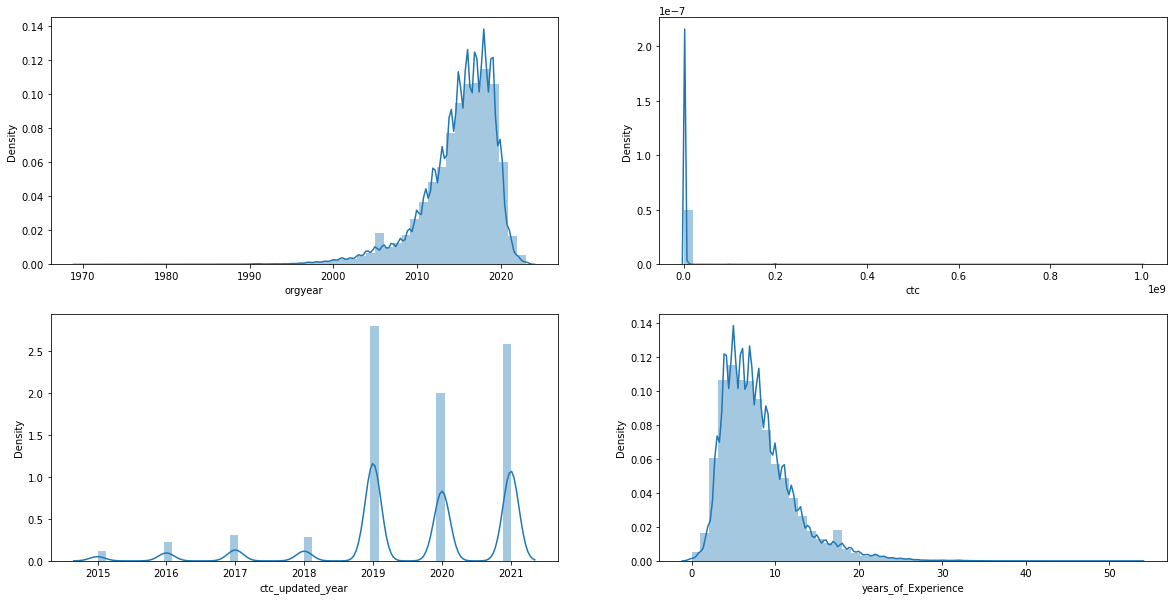

In [ ]:
#distplot for Continuous Variables
fig,axes =plt.subplots(2,2,figsize=(20, 10))
cols=['orgyear', 'ctc', 'ctc_updated_year', 'years_of_Experience']
for x in range(len(cols)):
    p=sns.distplot(df[cols[x]],ax=axes[x//2,x%2])

#### Univariate Analysis - Categorical Variables

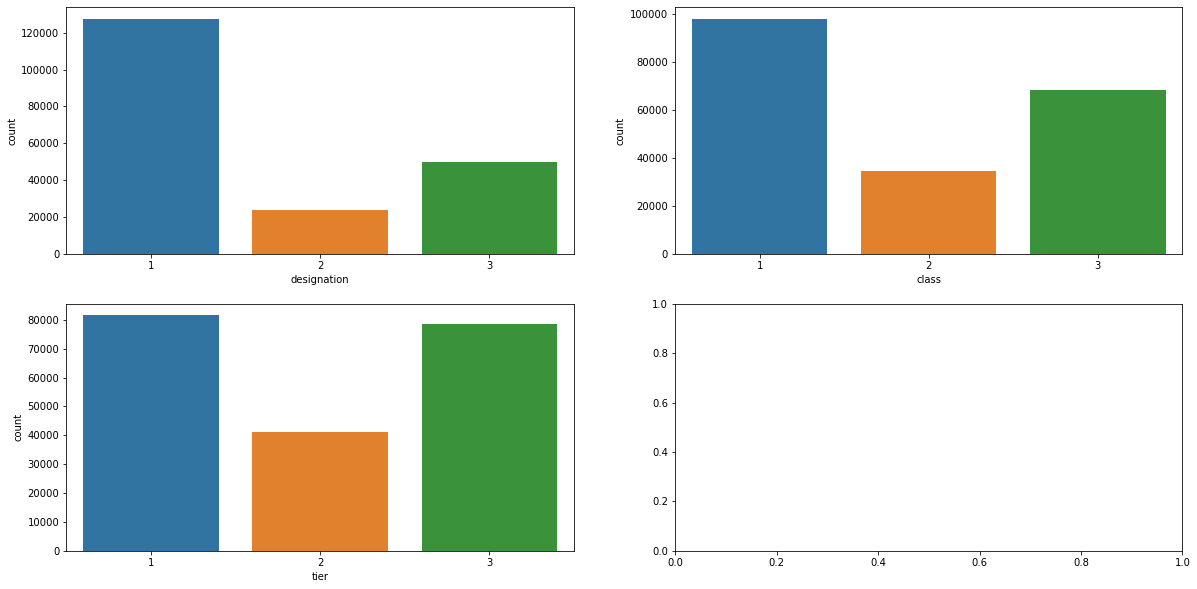

In [ ]:
# countplot for categorical columns
fig,axes=plt.subplots(2,2,figsize=(20, 10))
cols=['designation', 'class','tier']
for x in range(len(cols)):
    p=sns.countplot(df[cols[x]],ax=axes[x//2,x%2])

#### Bivariate Analysis

In [ ]:
# A broader look at correlation between the columns of dataframe
df.corr()

,orgyear,ctc,ctc_updated_year,years_of_Experience,designation,class,tier
orgyear,1.000000,-0.024789,0.213728,-1.000000,0.157225,0.239061,0.281188
ctc,-0.024789,1.000000,0.015539,0.024789,-0.081753,-0.109889,-0.131515
ctc_updated_year,0.213728,0.015539,1.000000,-0.213728,-0.030726,-0.026604,-0.042827
years_of_Experience,-1.000000,0.024789,-0.213728,1.000000,-0.157225,-0.239061,-0.281188
designation,0.157225,-0.081753,-0.030726,-0.157225,1.000000,0.662059,0.548810
class,0.239061,-0.109889,-0.026604,-0.239061,0.662059,1.000000,0.780093
tier,0.281188,-0.131515,-0.042827,-0.281188,0.548810,0.780093,1.000000


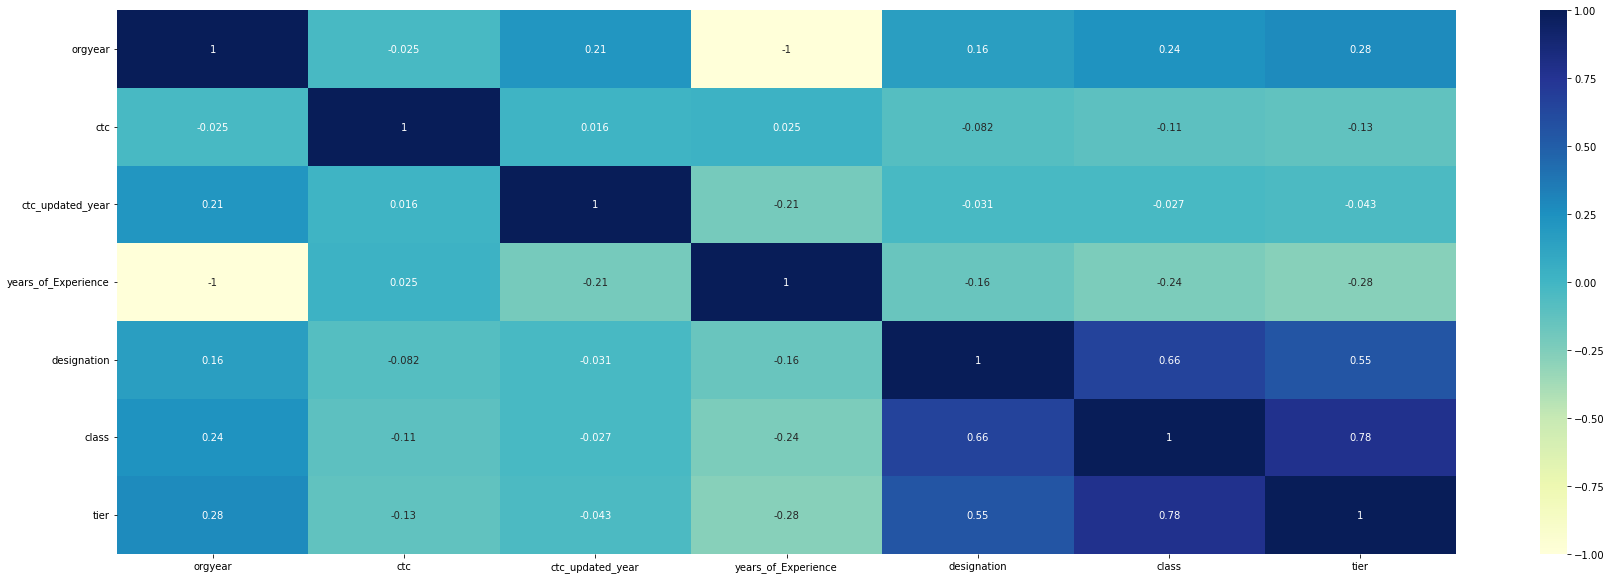

In [ ]:
# Correlation Plot above as a Heatmap -
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

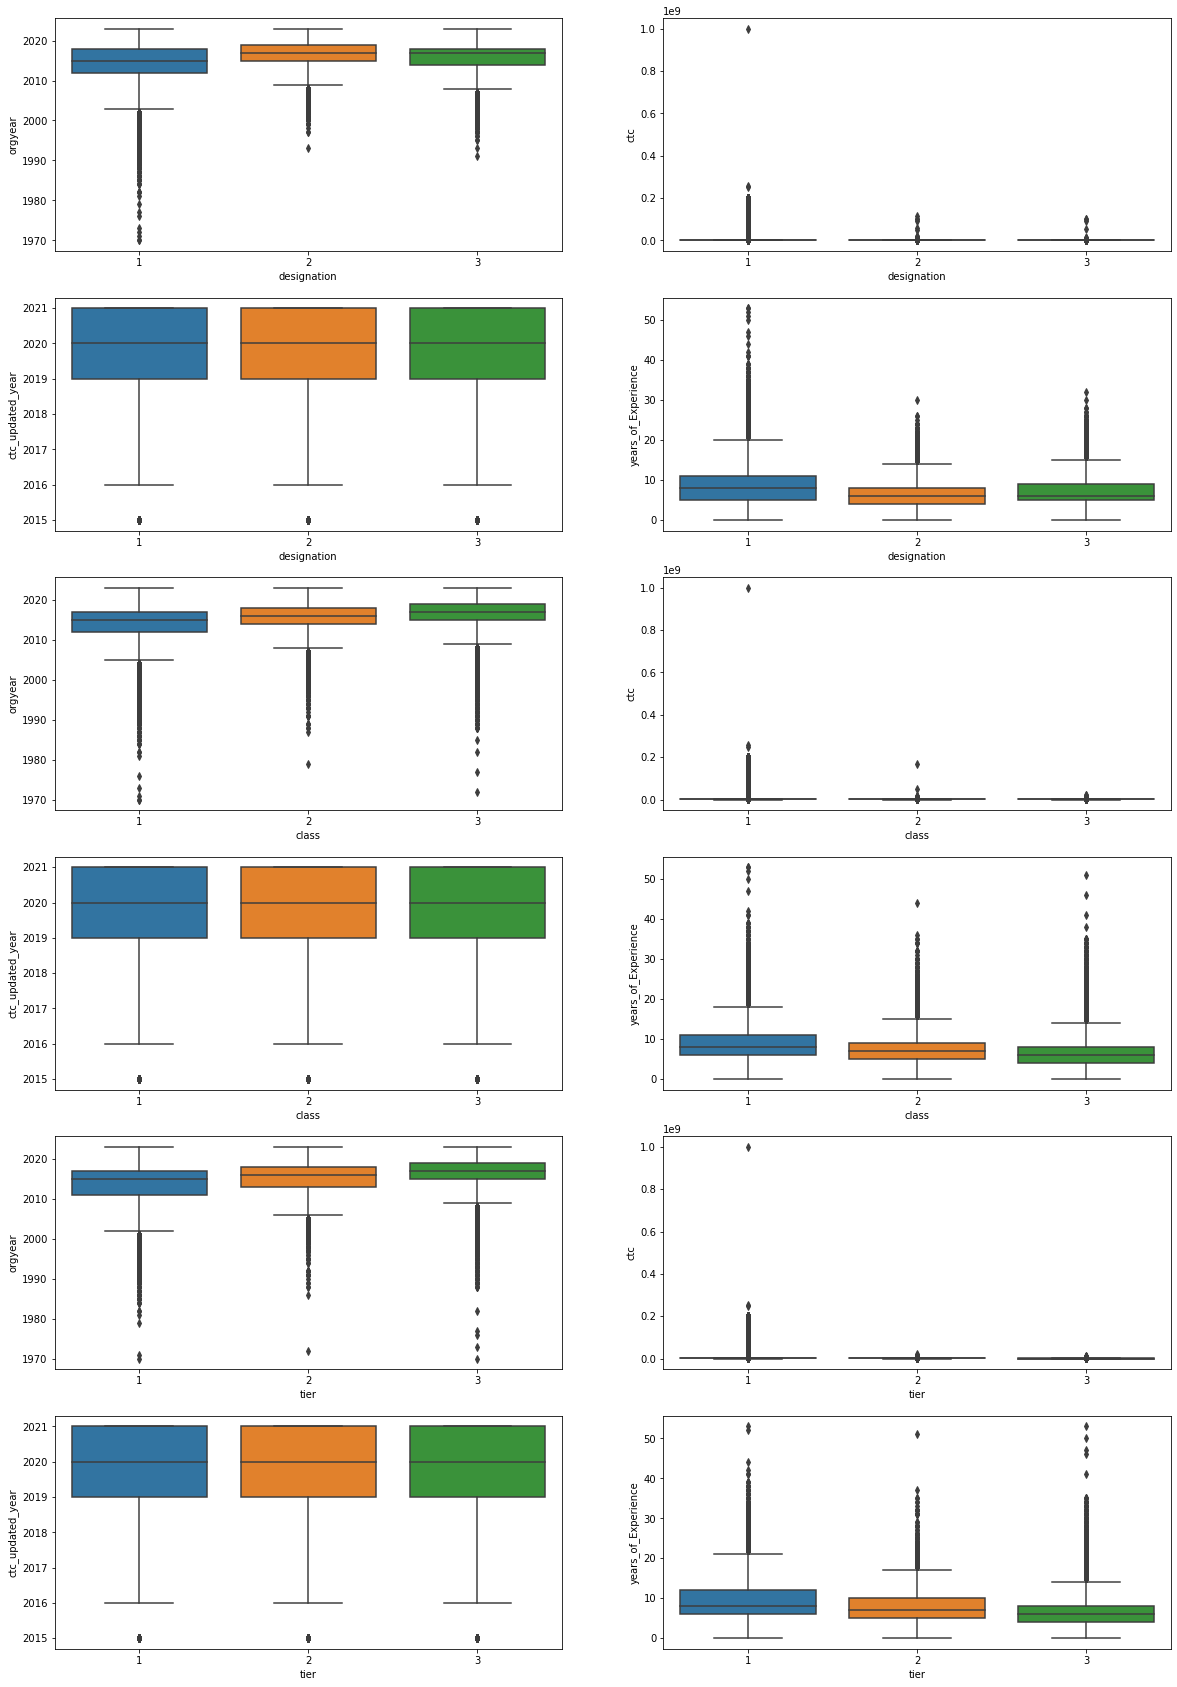

In [ ]:
#Boxplot for all categorical columns
#Outliers detetion
fig,axes =plt.subplots(6,2,figsize=(20, 30))
main_cols=['designation', 'class','tier']
cols=['orgyear', 'ctc', 'ctc_updated_year', 'years_of_Experience']
x=0
y=0
for i in range(len(main_cols)*len(cols)):
    if y==4:
        y=0
        x=x+1
    sns.boxplot(df[main_cols[x]],df[cols[y]],ax=axes[i//2,i%2])
    y=y+1

***Observations***

1) Many of Scaler learners falls in top or bottom category when it comes to designation, class or tier. This shows their is a room for upskilling for many learners who are in category 3.

2) Orgyear which is employment start year is negatively correlated with years of experience.

3) Designation, class and tier are highly correlated amongst each other.

4) CTC is correlated with ctc_updated_year and negatively correlated with designation, class and tier.

5) Years of Experience and CTC for designation 1, class 1 and tier 1 is more in comparison with other categories 2 and 3. The data has outliers.

6) CTC updated year follows a similar pattern for designation, class and tier with median value being at 2020. The data has outliers.

### Encoding

In [ ]:
#creating a copy of the dataframe to do further processing
df_copy=df.copy()

#### company_hash

In [ ]:
#Frequency Encoding
# grouping by frequency
fq = df_copy.groupby('company_hash').size()/len(df_copy)
# mapping values to dataframe
df_copy.loc[:, "{}_freq_encode".format('company_hash')] = df_copy['company_hash'].map(fq)
# drop original column.
df_copy = df_copy.drop(['company_hash'], axis=1)
df_copy.head()

,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience,designation,class,tier,company_hash_freq_encode
2940,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,other,2020.0,3.0,1,1,1,0.000005
197540,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,2017.0,300000,other,2020.0,6.0,1,1,1,0.000005
74429,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2016.0,270000,android engineer,2019.0,7.0,1,1,3,0.000010
55241,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,2011.0,830000,frontend engineer,2019.0,12.0,1,1,1,0.000010
139865,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,backend engineer,2021.0,4.0,1,1,1,0.000010


#### email_hash

In [ ]:
#Frequency Encoding
# grouping by frequency
fq = df_copy.groupby('email_hash').size()/len(df_copy)
# mapping values to dataframe
df_copy.loc[:, "{}_freq_encode".format('email_hash')] = df_copy['email_hash'].map(fq)
# drop original column.
df_copy = df_copy.drop(['email_hash'], axis=1)
df_copy.head()

,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience,designation,class,tier,company_hash_freq_encode,email_hash_freq_encode
2940,2020.0,100000,other,2020.0,3.0,1,1,1,0.000005,0.000005
197540,2017.0,300000,other,2020.0,6.0,1,1,1,0.000005,0.000005
74429,2016.0,270000,android engineer,2019.0,7.0,1,1,3,0.000010,0.000005
55241,2011.0,830000,frontend engineer,2019.0,12.0,1,1,1,0.000010,0.000005
139865,2019.0,1100000,backend engineer,2021.0,4.0,1,1,1,0.000010,0.000010


#### job_position

In [ ]:
#Frequency Encoding
# grouping by frequency
fq = df_copy.groupby('job_position').size()/len(df_copy)
# mapping values to dataframe
df_copy.loc[:, "{}_freq_encode".format('job_position')] = df_copy['job_position'].map(fq)
# drop original column.
df_copy = df_copy.drop(['job_position'], axis=1)
df_copy.head()

,orgyear,ctc,ctc_updated_year,years_of_Experience,designation,class,tier,company_hash_freq_encode,email_hash_freq_encode,job_position_freq_encode
2940,2020.0,100000,2020.0,3.0,1,1,1,0.000005,0.000005,0.329032
197540,2017.0,300000,2020.0,6.0,1,1,1,0.000005,0.000005,0.329032
74429,2016.0,270000,2019.0,7.0,1,1,3,0.000010,0.000005,0.026606
55241,2011.0,830000,2019.0,12.0,1,1,1,0.000010,0.000005,0.051726
139865,2019.0,1100000,2021.0,4.0,1,1,1,0.000010,0.000010,0.216302


In [ ]:
# creating a variable to retain names of new columns
df_copy_columns=df_copy.columns

### Standardization

In [ ]:
# standardizing the data
sc_x = StandardScaler()
df_copy = sc_x.fit_transform(df_copy)

### Unsupervised Learning - Clustering


#### Checking clustering tendency - Hopkins Test

In [ ]:
hopkins(df_copy,200)

0.004917999435947349

A score near 0 shows high clustering tendency.

#### Elbow method

In [ ]:
# Representing the dataframe with new variable X
X = df_copy

Distortion and Inertia are two metrics which is used when it comes to Elbow Method implementation. Below we calculate both of them and finalize on the best K for the K-means algorithm.

Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

Inertia: It is the sum of squared distances of samples to their closest cluster center.

In [ ]:
# Building the clustering model and calculating the values of the Distortion and Inertia
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
# different values of Distortion
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.9284237520937135
2 : 2.5157200376727364
3 : 2.344094768848065
4 : 2.297104568933588
5 : 2.203234466631577
6 : 2.1069272912171977
7 : 2.0234214381915687
8 : 1.9698100746481217
9 : 1.9016039128350861


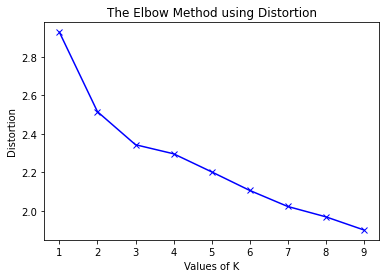

In [ ]:
# Visualizing Elbow Method using Distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
# different values of Inertia
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 2012329.999999999
2 : 1575096.5226300769
3 : 1375562.0034105673
4 : 1211574.4878628831
5 : 1097485.3434713774
6 : 1017541.3585555032
7 : 944839.6342226539
8 : 878175.5184835786
9 : 825234.2863061195


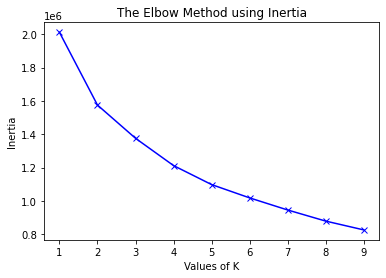

In [ ]:
# Visualizing Elbow Method using Inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

For the given dataset, we can conclude that the optimal number of clusters for the data is 2 on the basis of Elbow Method.

#### K-means clustering

In [ ]:
# Implementing K-means clustering for 2 clusters and creating the cluster label
km = KMeans(n_clusters=2)
km.fit(X)
predict=km.predict(X)
df_temp = df.copy()
df_temp['label']=pd.Series(predict,index=df_temp.index)
df_temp.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_Experience,designation,class,tier,label
2940,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,other,2020.0,3.0,1,1,1,1
197540,0000,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,2017.0,300000,other,2020.0,6.0,1,1,1,1
74429,01 ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2016.0,270000,android engineer,2019.0,7.0,1,1,3,1
55241,01 ojztqsj,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,2011.0,830000,frontend engineer,2019.0,12.0,1,1,1,1
139865,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,backend engineer,2021.0,4.0,1,1,1,1


In [ ]:
# count of different clusters based on K-means clustering
df_temp['label'].value_counts()

1    113980
0     87253
Name: label, dtype: int64

In [ ]:
# converting label column as categorical column
df_temp['label'] = df_temp['label'].astype('category')

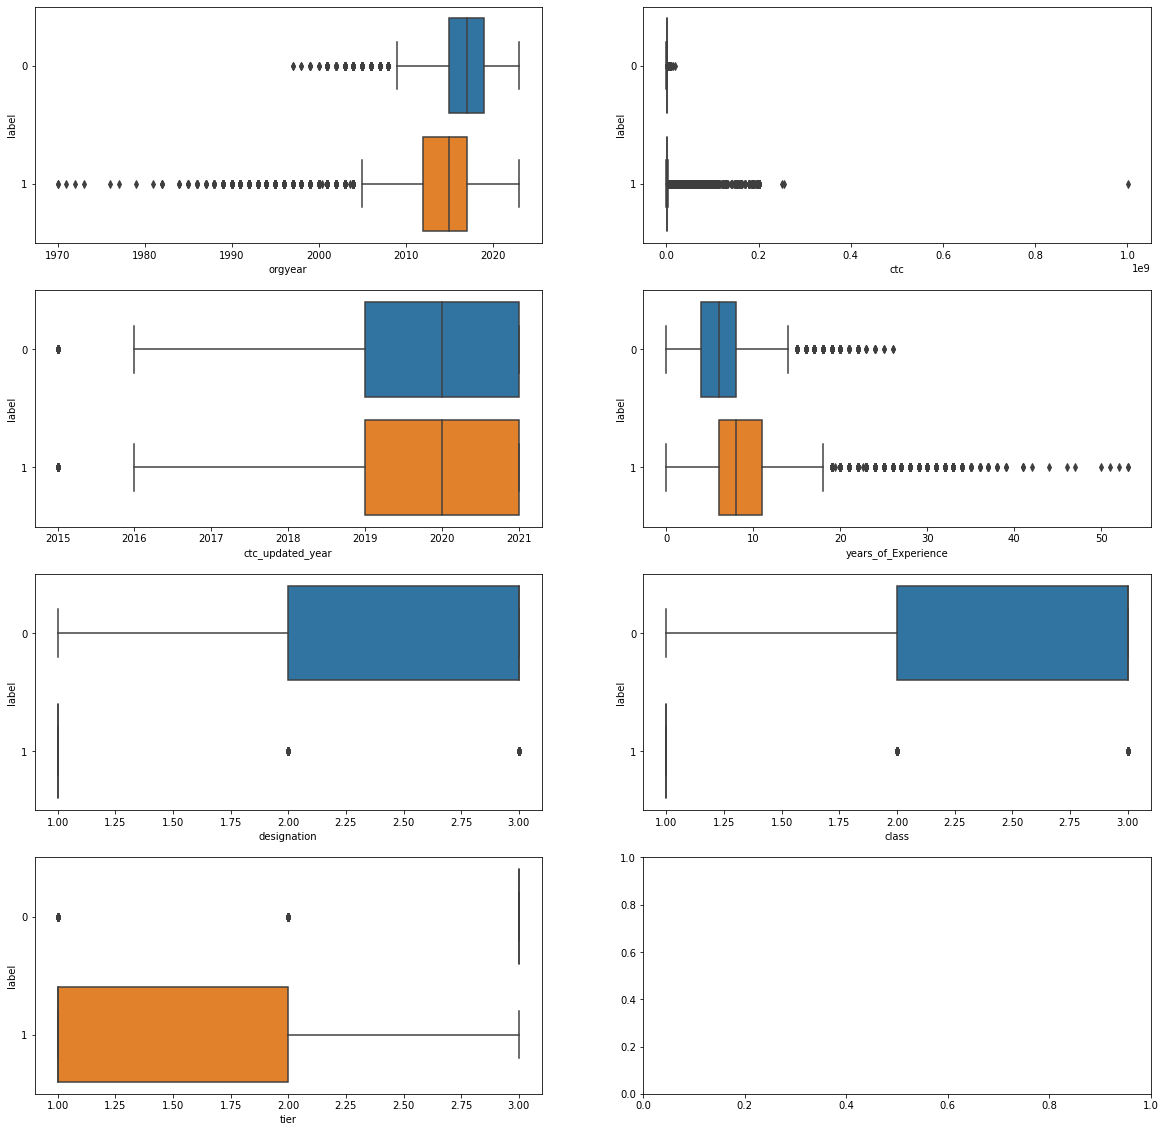

In [ ]:
# countplot for categorical columns
fig,axes=plt.subplots(4,2,figsize=(20, 20))
cols=['orgyear', 'ctc', 'ctc_updated_year', 'years_of_Experience', 'designation', 'class', 'tier']
for x in range(len(cols)):
    p=sns.boxplot(df_temp[cols[x]],df_temp['label'],ax=axes[x//2,x%2])

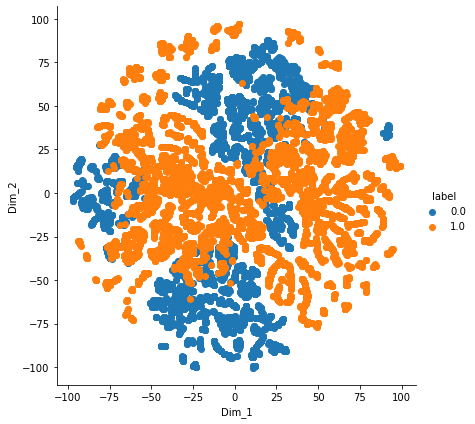

In [ ]:
# Visualizing clusters in lower dimensions using T-SNE algorithm
data_20000 = X[0:20000, :]
labels_20000 = df_temp['label'][0:20000]
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(data_20000)
tsne_data = np.vstack((tsne_data.T, labels_20000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue ="label", size = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.show()

***Observations***

1) K-means clustering is able to cluster out the relevant groups within the dataset.

2) Visualization of clusters is not completely satisfactory but it is giving us some perspective about the different learner groups.

3) The groups of different learners are loosely dense and not tight.

4) As per clusters, one group is more experienced then the other group learners.

5) Average CTC of one of the group is more then the other one.

6) CTC updated year follows same pattern for both the group learners.

7) Designation and Class for one of the group has learners from all levels but the other group contains majorly from level 1.

8) For tier, one of the group has learners from all levels but the other group contains majorly from level 3.

#### Hierarchical Clustering

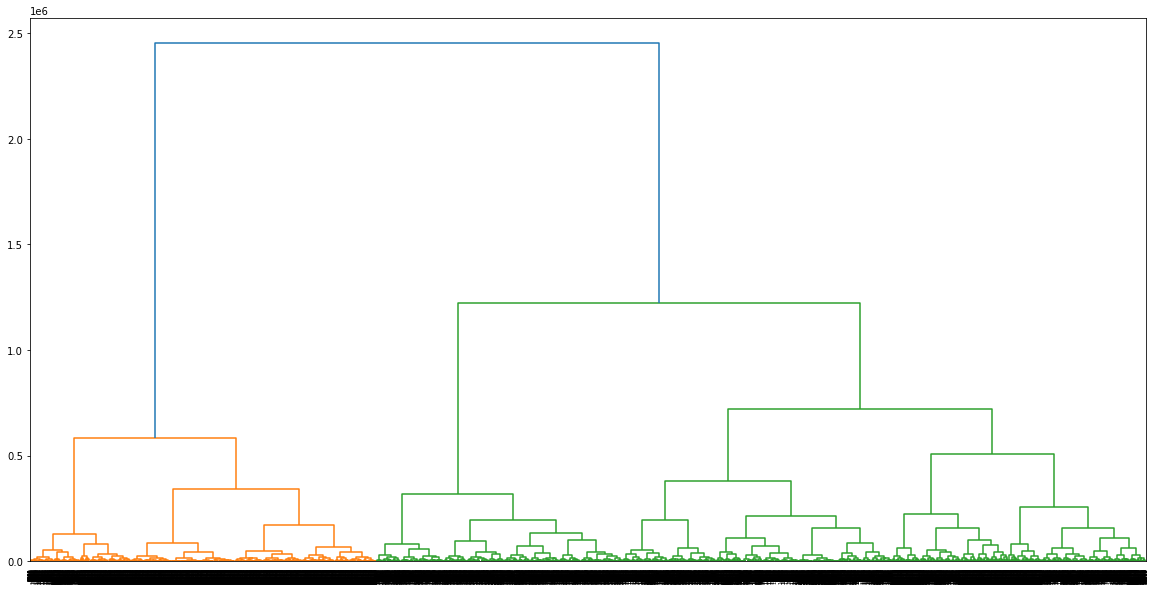

In [ ]:
# Implementing Hierarchical clustering for 2 clusters
model = AgglomerativeClustering(n_clusters=2)
model = model.fit(X[0:20000, :])
Z = hierarchy.linkage(model.children_, 'ward')
plt.figure(figsize=(20,10))

# Visualizing Hierarchical clustering for 2 clusters
dn = hierarchy.dendrogram(Z)

***Observations***

1) Ward linkage is used to implement hierarchical linkage.

2) The three clusters are clearly visible from the dendogram.

3) This hierarchical clustering implementation is on a sample data as implementation on the whole dataset was taking

### Actionable Insights & Recommendations

1) Many of the scaler learners are in category 3 for designation or class or tier so they have a genuine scope of upskilling.

2) Many of the scaler learners are in category 1 for designation or class or tier so they have a scope of upskilling and switching either the job position or company.

3) More experience in the industry generally tends to get you higher ctc.

4) CTC hike happens every year for every individual. For some hike is more and for some hike is less which creates the difference in CTC package despite being at same position.

5) More the years of experience tends to up a learner's level in designation, class and tier.

6) Scaler should keep suggesting its learners about the opportunities within the same company as well as in another company on the same position.

7) Scaler should showcase this data on the learners dashboard with proper insights so as to motivate learner to work hard towards his/her goal.

8) Scaler should try to acquire more customers by giving training to its business development associate about the insights analyzed from the data so that BDAs can explain upskilling chances to the new customers.